In [1]:
library(ggplot2)
library(plyr)
library(dplyr)
library(data.table)
library(tidyr)
library(tidyverse)
library(ggplot2)
library(ggsignif) 
library(ggpubr) 
library(reshape2)
library(ggsci) 
library(stringr)
library(ggvenn)
library(ggpubr)
library(shazam)

options(repr.matrix.max.rows=600, repr.matrix.max.cols=200) 
options(repr.plot.width = 6, repr.plot.height = 6)


载入程辑包：'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



载入程辑包：'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v lubridate 1.9.2     v stringr   1.5.0
v purrr     1.0.1     v tibble    3.2.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::arrange()      masks plyr::arrange()
x data.table::between() masks dplyr::between()
x purrr::compact()      masks plyr::compact()
x dplyr::count()        masks plyr::count()
x dplyr::desc()         masks plyr::desc()
x dplyr::failwith()     masks plyr::failwith()
x dplyr::filte

In [2]:
db<-fread("all3up_clone-pass_germ-pass_mutation-pass_selected_rows.tsv")%>%as.data.frame()

In [3]:
dim(db)

[1] 449784     18

# add group infor

In [4]:
#IG类型比较
mypal <- ggsci::pal_npg(palette ="nrc", alpha = 0.7)(10)
mypal2<-ggsci::pal_jama(palette ="default", alpha = 0.7)(6)
mypal3<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.7)(9)
mypal4 <- ggsci::pal_npg(palette ="nrc", alpha = 0.5)(10)
mypal5<-ggsci::pal_jama(palette ="default", alpha = 0.5)(6)
mypal6<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.5)(9)
mypal7 <- ggsci::pal_npg(palette ="nrc", alpha = 0.3)(10)
mypal8<-ggsci::pal_jama(palette ="default", alpha = 1)(6)
mypal9<-ggsci::pal_lancet(palette ="lanonc", alpha = 1)(9)

mypal<-c(mypal3,mypal2,mypal,mypal6,mypal5,mypal4,mypal9,mypal8,mypal7)

mypal[3]<-"#FFBD7A"


In [5]:
db$sample=str_split(db$sequence_id,"_",simplify = TRUE)[,1]
db$patient=str_sub(db$sequence_id,1,7)
db$tissue=str_sub(db$sequence_id,8,8)
db$tissue<-factor(db$tissue,levels=c("T","N","L"),ordered = TRUE)
#db$c_call<-factor(db$c_call,levels=c("IGHD","IGHM","IGHA1","IGHA2","IGHG1","IGHG2","IGHG3","IGHG4","IGHE"),ordered = TRUE)
db$with_l<-""
patients_with_L<-db$patient[db$tissue=="L"] %>% unique()
patients_with_L %>%length()

db$with_l[db$patient %in% patients_with_L]<-"with_L"
db$with_l[!db$patient %in% patients_with_L]<-"without_L"

[1] 27

# 1.比较不同Isotype mutation

In [6]:
options(repr.plot.width = 18, repr.plot.height = 25)

data<-db
data$c_call<-substr(data$c_call,1,4)
data$c_call<-factor(data$c_call,levels=c("IGHD","IGHM","IGHA","IGHG","IGHE"),ordered = TRUE)


In [7]:

data<-data[order(data$patient,decreasing = FALSE),]
grep("ESCC066",data$patient)


[1] 220201 220202 220203 220204 220205 220206 220207 220208 220209 220210
  [11] 220211 220212 220213 220214 220215 220216 220217 220218 220219 220220
  [21] 220221 220222 220223 220224 220225 220226 220227 220228 220229 220230
  [31] 220231 220232 220233 220234 220235 220236 220237 220238 220239 220240
  [41] 220241 220242 220243 220244 220245 220246 220247 220248 220249 220250
  [51] 220251 220252 220253 220254 220255 220256 220257 220258 220259 220260
  [61] 220261 220262 220263 220264 220265 220266 220267 220268 220269 220270
  [71] 220271 220272 220273 220274 220275 220276 220277 220278 220279 220280
  [81] 220281 220282 220283 220284 220285 220286 220287 220288 220289 220290
  [91] 220291 220292 220293 220294 220295 220296 220297 220298 220299 220300
 [101] 220301 220302 220303 220304 220305 220306 220307 220308 220309 220310
 [111] 220311 220312 220313 220314 220315 220316 220317 220318 220319 220320
 [121] 220321 220322 220323 220324 220325 220326 220327 220328 220329 220330
 [131] 220331 220332 220333 220334 220335 220336 220337 220338 220339 220340
 [141] 220341 220342 220343 220344 220345 220346 220347 220348 220349 220350
 [151] 220351 220352 220353 220354 220355 220356 220357 220358 220359 220360
 [161] 220361 220362 220363 220364 220365 220366 220367 220368 220369 220370
 [171] 220371 220372 220373 220374 220375 220376 220377 220378 220379 220380
 [181] 220381 220382 220383 220384 220385 220386 220387 220388 220389 220390
 [191] 220391 220392 220393 220394 220395 220396 220397 220398 220399 220400
 [201] 220401 220402 220403 220404 220405 220406 220407 220408 220409 220410
 [211] 220411 220412 220413 220414 220415 220416 220417 220418 220419 220420
 [221] 220421 220422 220423 220424 220425 220426 220427 220428 220429 220430
 [231] 220431 220432 220433 220434 220435 220436 220437 220438 220439 220440
 [241] 220441 220442 220443 220444 220445 220446 220447 220448 220449 220450
 [251] 220451 220452 220453 220454 220455 220456 220457 220458 220459 220460
 [261] 220461 220462 220463 220464 220465 220466 220467 220468 220469 220470
 [271] 220471 220472 220473 220474 220475 220476 220477 220478 220479 220480
 [281] 220481 220482 220483 220484 220485 220486 220487 220488 220489 220490
 [291] 220491 220492 220493 220494 220495 220496 220497 220498 220499 220500
 [301] 220501 220502 220503 220504 220505 220506 220507 220508 220509 220510
 [311] 220511 220512 220513 220514 220515 220516 220517 220518 220519 220520
 [321] 220521 220522 220523 220524 220525 220526 220527 220528 220529 220530
 [331] 220531 220532 220533 220534 220535 220536 220537 220538 220539 220540
 [341] 220541 220542 220543 220544 220545 220546 220547 220548 220549 220550
 [351] 220551 220552 220553 220554 220555 220556 220557 220558 220559 220560
 [361] 220561 220562 220563 220564 220565 220566 220567 220568 220569 220570
 [371] 220571 220572 220573 220574 220575 220576 220577 220578 220579 220580
 [381] 220581 220582 220583 220584 220585 220586 220587 220588 220589 220590
 [391] 220591 220592 220593 220594 220595 220596 220597 220598 220599 220600
 [401] 220601 220602 220603 220604 220605 220606 220607 220608 220609 220610
 [411] 220611 220612 220613 220614 220615 220616 220617 220618 220619 220620
 [421] 220621 220622 220623 220624 220625 220626 220627 220628 220629 220630
 [431] 220631 220632 220633 220634 220635 220636 220637 220638 220639 220640
 [441] 220641 220642 220643 220644 220645 220646 220647 220648 220649 220650
 [451] 220651 220652 220653 220654 220655 220656 220657 220658 220659 220660
 [461] 220661 220662 220663 220664 220665 220666 220667 220668 220669 220670
 [471] 220671 220672 220673 220674 220675 220676 220677 220678 220679 220680
 [481] 220681 220682 220683 220684 220685 220686 220687 220688 220689 220690
 [491] 220691 220692 220693 220694 220695 220696 220697 220698 220699 220700
 [501] 220701 220702 220703 220704 220705 220706 220707 220708 220709 220710
 [511] 220711 220712 220713 220714 220715 220716 220717 220718 220719 220720

In [29]:
rev(grep("ESCC032",data$patient))[1]
rev(grep("ESCC062",data$patient))[1]
rev(grep("ESCC090",data$patient))[1]

[1] 66258

[1] 194544

[1] 324006

In [8]:
data1<-data[1:66258,]

data2<-data[66259:194544,]

data3<-data[194545:324006,]

data4<-data[324007:nrow(data),]


In [9]:
db_L<-db[db$with_l=="with_L",]
db_L$tissue<-factor(db_L$tissue,levels<-c("T","N","L"))

Warning message:
"Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! 需要TRUE/FALSE值的地方不可以用缺少值"
Warning message:
"Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! 需要TRUE/FALSE值的地方不可以用缺少值"
Warning message:
"Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! 需要TRUE/FALSE值的地方不可以用缺少值"
Warning message:
"Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! 需要TRUE/FALSE值的地方不可以用缺少值"
Warning message:
"Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! 需要TRUE/FALSE值的地方不可以用缺少值"
Warning message:
"Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! 需要TRUE/FALSE值的地方不可以用缺少值"
Warning message:
"Computatio

null device 
          1

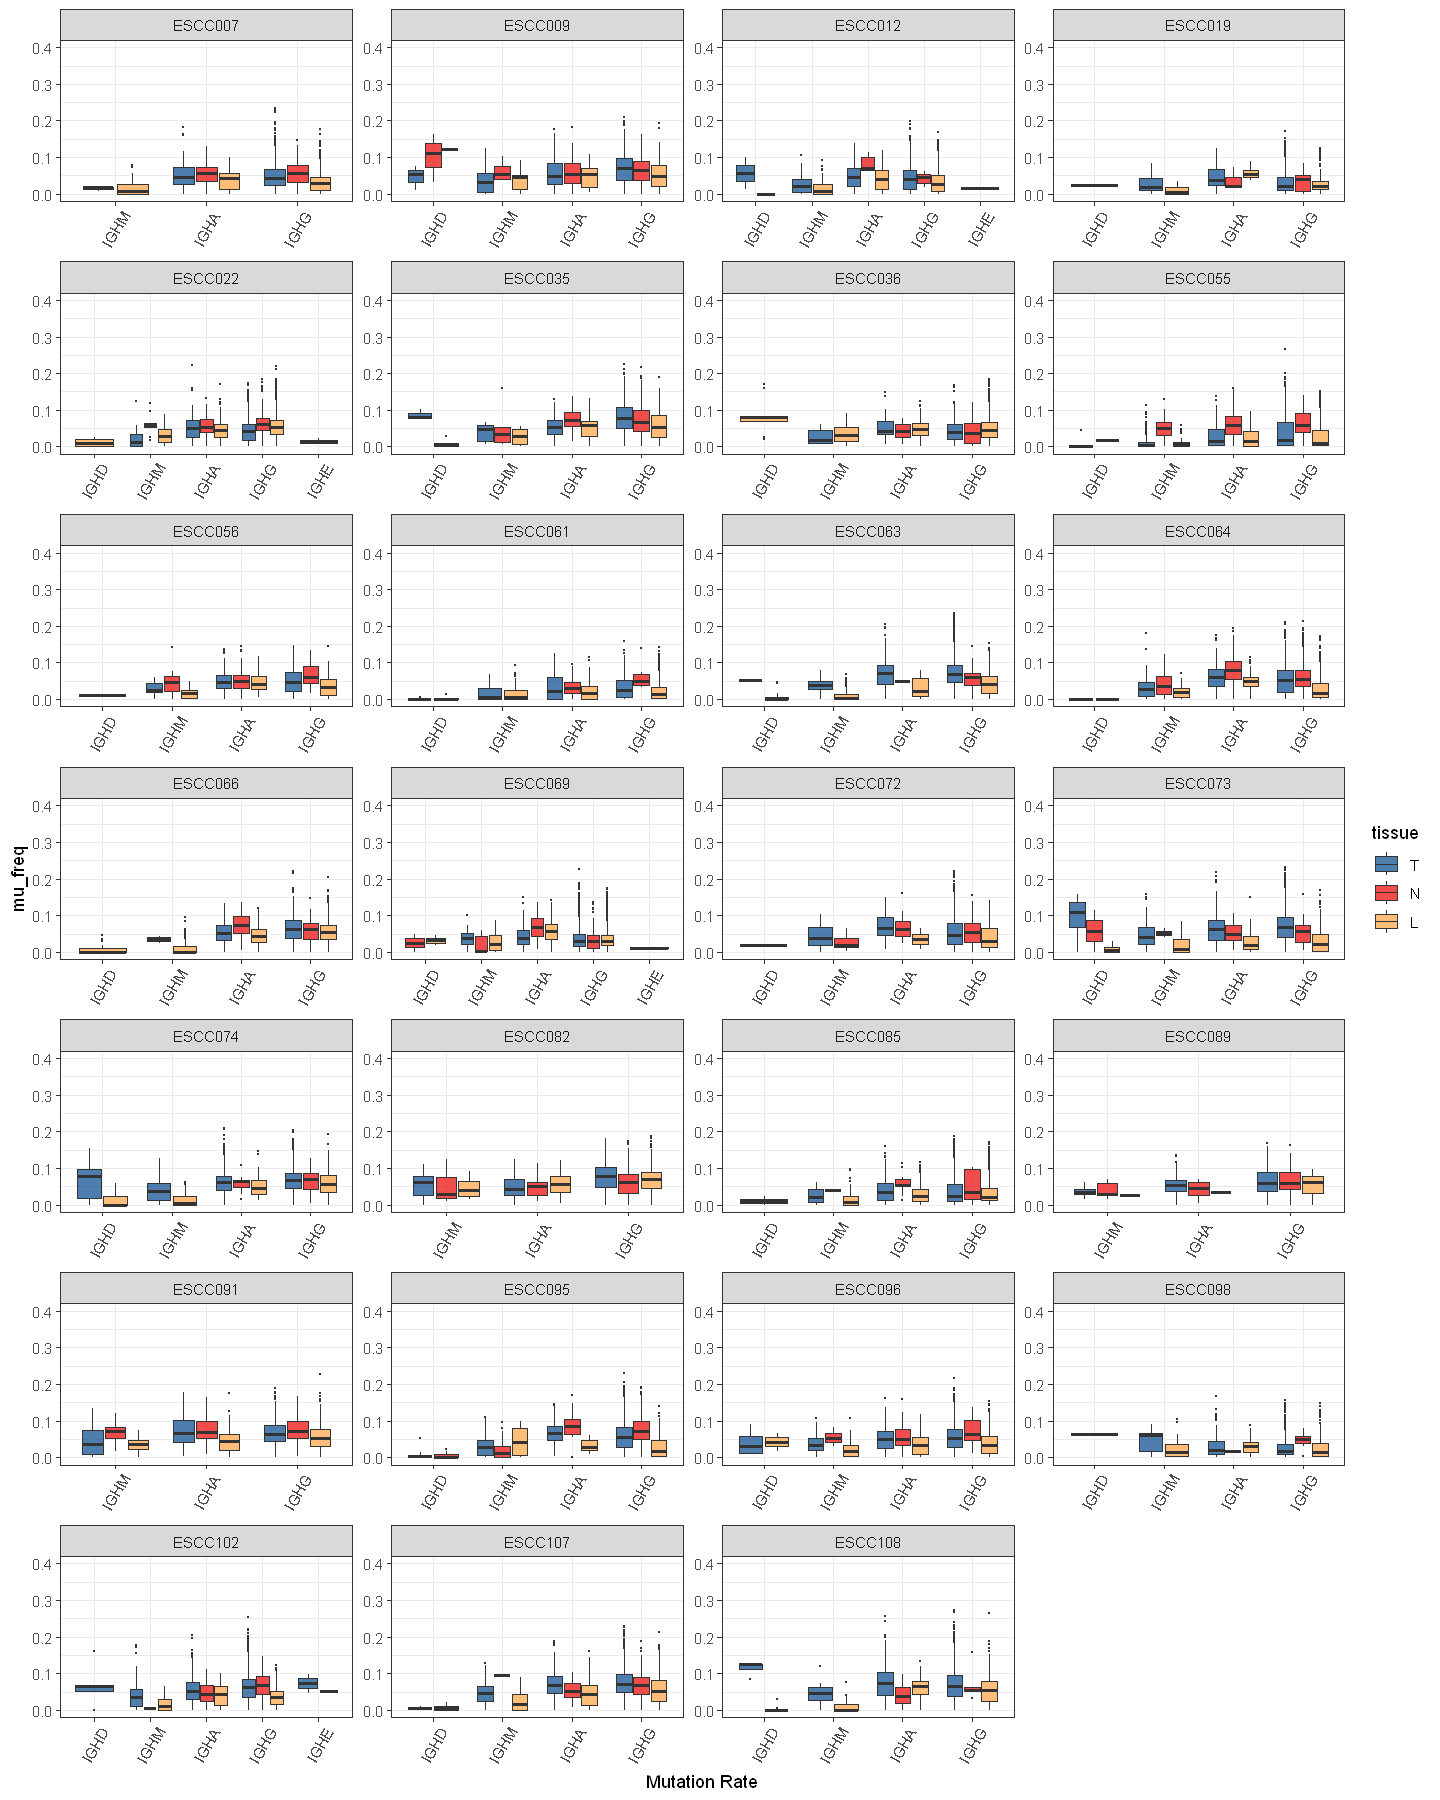

In [10]:
options(repr.plot.width = 12, repr.plot.height = 15)
db_L<-db[db$with_l=="with_L",]
db_L$c_call<-substr(db_L$c_call,1,4)
db_L$c_call<-factor(db_L$c_call,levels=c("IGHD","IGHM","IGHA","IGHG","IGHE"))
gL<-ggplot(db_L,aes(x=c_call,y=mu_freq,fill=tissue))+
    #geom_violin()+
    geom_boxplot(outlier.size = .1)+
    geom_signif(comparisons = list(c("T", "N"),c("T", "L"),c("L", "N")),na.rm=TRUE,
              map_signif_level=T,
              textsize=4,test=wilcox.test,step_increase=0.1,vjust=1.5,tip_length=0.02)+
    scale_fill_manual(values=mypal)+ylim(0,0.4)+
     facet_wrap(~patient,ncol=4,nrow=7,scales="free",shrink=TRUE)+
     xlab("Mutation Rate")+
     theme_bw()+
     theme(axis.text.x=element_text(angle=60,vjust=.5))

#pdf("IG_mutation_grouped_by_ccall_10types_tissue_box_only_L.pdf",12,15)
gL
dev.off()

In [17]:
db_L_selected<-db_L[,c('patient','c_call','mu_freq','tissue')]
db_L_selected[1:3,]
write.csv(db_L_selected,"Fig6AB.csv",quote=FALSE,row.names=FALSE)

,patient,c_call,mu_freq,tissue
,<chr>,<fct>,<dbl>,<ord>
2,ESCC102,IGHG,0.03478261,L
45,ESCC055,IGHG,0.00000000,L
46,ESCC055,IGHA,0.00000000,L


## 1.2 比较不同组织的各Isotyope mutation

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"Computation failed in `stat_signif()`:
not enough 'y' observations"


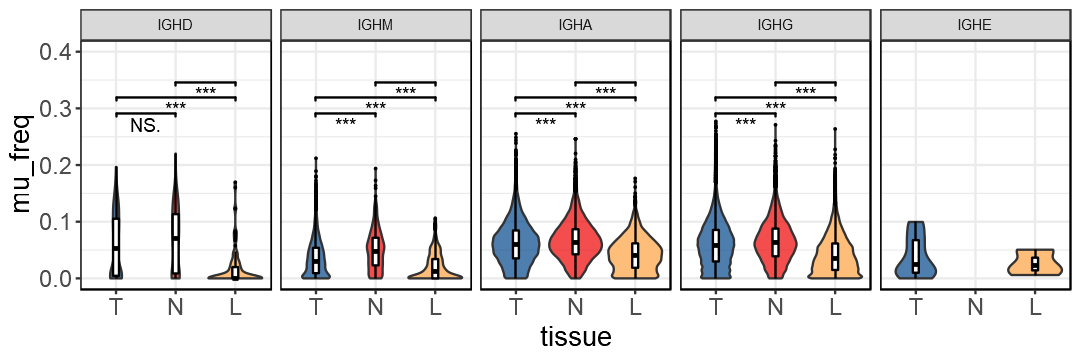

In [38]:
#head(db)
data<-db
data$c_call<-substr(data$c_call,1,4)
data$c_call<-factor(data$c_call,levels=c("IGHD","IGHM","IGHA","IGHG","IGHE"),ordered = TRUE)

options(repr.plot.width = 9, repr.plot.height = 3)
ggplot(data,aes(x=tissue,y=mu_freq))+
    geom_violin(aes(x=tissue,y=mu_freq,fill=tissue))+
    ylim(0,0.4)+
    geom_boxplot(aes(x=tissue,y=mu_freq),col="black",width=.1,outlier.size = .01)+
    geom_signif(comparisons = list(c("T", "N"),c("T", "L"),c("L", "N")),
              map_signif_level=T,
              textsize=4,test=wilcox.test,step_increase=0.1,vjust=1.5,tip_length=0.02)+
    theme_bw()+
    scale_color_manual(values=mypal)+
    scale_fill_manual(values=mypal)+
    theme(panel.border = element_rect(fill=NA,color="black",size=0.5,linetype="solid"))+
    theme(axis.text=element_text(size=14))+
    theme(axis.title = element_text(size = 16))+
    facet_wrap(~c_call,nrow=1)+
    guides(fill=FALSE)

### dist_to_nearest


In [18]:
# Use nucleotide Hamming distance and normalize by junction length

dist_ham <- distToNearest(db, sequenceColumn="junction",vCallColumn="v_call", jCallColumn="j_call",model="ham", normalize="len", nproc=6)

In [22]:
dist_ham_selected<-dist_ham[,c(1,ncol(dist_ham))]



In [25]:
write.csv(dist_ham_selected,"Fig6C.csv",row.names=FALSE,quote=FALSE)

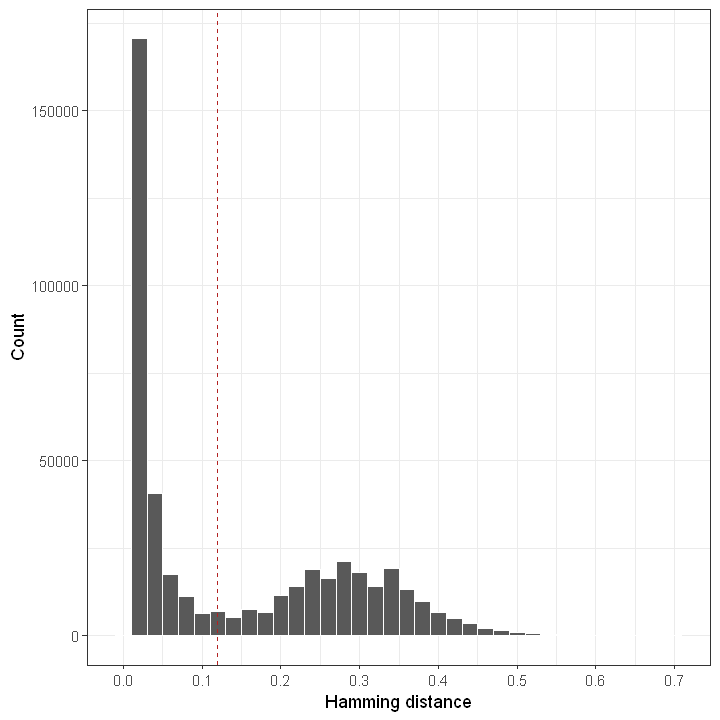

In [8]:
# Generate Hamming distance histogram
library(ggplot2)
p1 <- ggplot(subset(dist_ham, !is.na(dist_nearest)),aes(x=dist_nearest)) +
    theme_bw() +
    xlab("Hamming distance") +
    ylab("Count") +
    scale_x_continuous(breaks=seq(0, 1, 0.1)) +
    geom_histogram(color="white", binwidth=0.02) +
    geom_vline(xintercept=0.12, color="firebrick", linetype=2)

plot(p1)